In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/kaggle/input/flower-102diffspecies-dataset/flower_data/flower_data/train'
valid_path = '/kaggle/input/flower-102diffspecies-dataset/flower_data/valid'

In [3]:
# useful for getting number of output classes
folders = glob(train_path +'/*')
len(folders)

102

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [5]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [6]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [8]:

# view the structure of the model
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 6552 images belonging to 102 classes.


In [12]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 818 images belonging to 102 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
205/205 [==============================] - 130s 635ms/step - loss: 2.5875 - accuracy: 0.4799 - val_loss: 1.4364 - val_accuracy: 0.6553
Epoch 2/10
205/205 [==============================] - 106s 516ms/step - loss: 0.8395 - accuracy: 0.7776 - val_loss: 1.3537 - val_accuracy: 0.6919
Epoch 3/10
205/205 [==============================] - 106s 516ms/step - loss: 0.5065 - accuracy: 0.8600 - val_loss: 1.0287 - val_accuracy: 0.7543
Epoch 4/10
205/205 [==============================] - 105s 515ms/step - loss: 0.3406 - accuracy: 0.9052 - val_loss: 1.0456 - val_accuracy: 0.7763
Epoch 5/10
205/205 [==============================] - 108s 527ms/step - loss: 0.2388 - accuracy: 0.9267 - val_loss: 1.0795 - val_accuracy: 0.7579
Epoch 6/10
205/205 [==============================] - 105s 511ms/step - loss: 0.2143 - accuracy: 0.9382 - val_loss: 1.0012 - val_accuracy: 0.7775
Epoch 7/10
205/205 [==============================] - 108s 525ms/step - loss: 0.1792 - accuracy: 0.9461 - val_loss: 1.0156 -

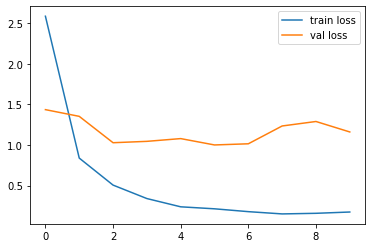

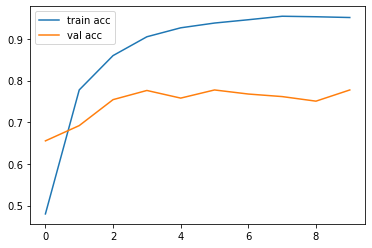

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')